In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
import diff_register.im_process as imp
import skimage.io as sio
import diff_classifier.aws as aws
%matplotlib inline

In [2]:
rfolder = 'microglia'
lfolder = 'data'
fname = 'mglia_small'
ext = 'tif'
rfile = '{}/{}.{}'.format(rfolder, fname, ext)
lfile = '{}/{}.{}'.format(lfolder, fname, ext)
file = '{}.{}'.format(fname, ext)

In [3]:
skeleton0, branch_data_short, nbranches, short_image, props = imp.skeleton_image(lfolder, file, show=False)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [4]:
def mglia_features(props):
    X = np.zeros((len(props)))
    Y = np.zeros((len(props)))
    perimeter = np.zeros((len(props)))
    areas = np.zeros((len(props)))
    eccentricity = np.zeros((len(props)))
    inertia_tensor = [0]*len(props)
    label = [0]*len(props)
    max_intensity = np.zeros((len(props)))
    mean_intensity = np.zeros((len(props)))
    moments = [0]*len(props)
    solidity = np.zeros((len(props)))
    total_processes = np.zeros((len(props)))
    avg_p_ength = np.zeros((len(props)))
    main_process = np.zeros((len(props)))

    counter = 0
    for item in props:
        X[counter] = item.centroid[0]
        Y[counter] = item.centroid[1]
        perimeter[counter] = item.perimeter
        areas[counter] = item.area
        eccentricity[counter] = item.eccentricity
        inertia_tensor[counter] = item.inertia_tensor
        label[counter] = item.label
        #max_intensity[counter] = item.max_intensity
        #mean_intensity[counter] = item.mean_intensity
        moments[counter] = item.moments
        solidity[counter] = item.solidity
        counter = counter + 1

    features = pd.DataFrame({ 'X' : X,
                              'Y' : Y,
                              'perimeter' : perimeter,
                              'area' : areas,
                              'eccentricity' : eccentricity,
                              'inertia_tensor' : inertia_tensor,
                              'label' : label,
                              #'max intensity' : max_intensity,
                              #'mean intensity' : mean_intensity,
                              'moments' : moments,
                              'solidity' : solidity,
                            })
    
    return features

In [5]:
features = mglia_features(props)

In [6]:
features

,X,Y,area,eccentricity,inertia_tensor,label,moments,perimeter,solidity
0,6.588235,135.952941,85.0,0.953843,"[[12.0683737024, 14.4311418685], [14.431141868...",1,"[[85.0, 560.0, 5960.0, 78680.0], [591.0, 2667....",51.449747,0.653846
1,13.098940,425.579505,283.0,0.897168,"[[14.9291912747, -1.8366567194], [-1.836656719...",4,"[[283.0, 3707.0, 70119.0, 1572197.0], [2994.0,...",109.911688,0.600849
2,8.524345,494.209738,267.0,0.594531,"[[78.8174332646, -10.0398378431], [-10.0398378...",6,"[[267.0, 2276.0, 34760.0, 621386.0], [4862.0, ...",140.526912,0.451777
3,7.571429,860.548571,175.0,0.586775,"[[12.9904979592, -2.37224489796], [-2.37224489...",7,"[[175.0, 1325.0, 13017.0, 141527.0], [1146.0, ...",52.384776,0.902062
4,12.758929,515.669643,112.0,0.872872,"[[6.54264987245, 1.05285395408], [1.0528539540...",10,"[[112.0, 1205.0, 16011.0, 237635.0], [523.0, 5...",60.142136,0.662722
5,10.475000,282.550000,80.0,0.659562,"[[7.9475, 1.48625], [1.48625, 5.624375]]",13,"[[80.0, 358.0, 2052.0, 13168.0], [444.0, 1868....",32.970563,0.941176
6,64.531100,933.944710,1881.0,0.898542,"[[227.465310934, -208.253713158], [-208.253713...",15,"[[1881.0, 93168.0, 5869338.0, 419035626.0], [7...",587.428499,0.398011
7,54.421502,405.026451,1172.0,0.623413,"[[167.020631428, -25.1740046477], [-25.1740046...",17,"[[1172.0, 32138.0, 1021486.0, 35241476.0], [34...",297.971609,0.559160
8,59.635135,566.748311,1184.0,0.972119,"[[745.85726066, 262.674602812], [262.674602812...",20,"[[1184.0, 33904.0, 1142626.0, 42430690.0], [50...",374.498521,0.385291
9,65.624789,675.067454,1186.0,0.813696,"[[314.668299924, 77.6551291202], [77.655129120...",21,"[[1186.0, 38693.0, 1436767.0, 57686231.0], [38...",385.155375,0.406861


In [28]:
features['moments'][1]

(4, 4)

In [21]:
def features_hist(features, feature, bin_size=100, bin_range=5000):
    xlabel = "Microglia {} (pixels)".format(feature)
    ylabel = "Count"

    nbins = bin_range/bin_size + 1
    test_bins = np.linspace(0, bin_range, nbins)
    dist = features[feature]
    
    histogram, test_bins = np.histogram(dist, bins=test_bins)

    # Plot_general_histogram_code
    avg = np.mean(dist)
    fig = plt.figure(figsize=(16, 6))

    plt.rc('axes', linewidth=2)
    plot = histogram
    bins = test_bins
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:])/2
    bar = plt.bar(center, plot, align='center', width=width)
    plt.axvline(avg)
    plt.xlabel(xlabel, fontsize=30)
    plt.ylabel(ylabel, fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    
    plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


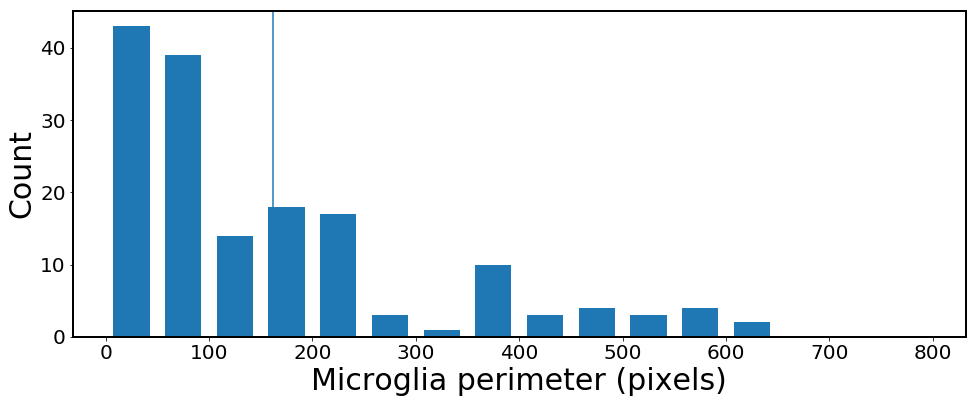

In [24]:
features_hist(features, 'perimeter', bin_size=50, bin_range=800)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


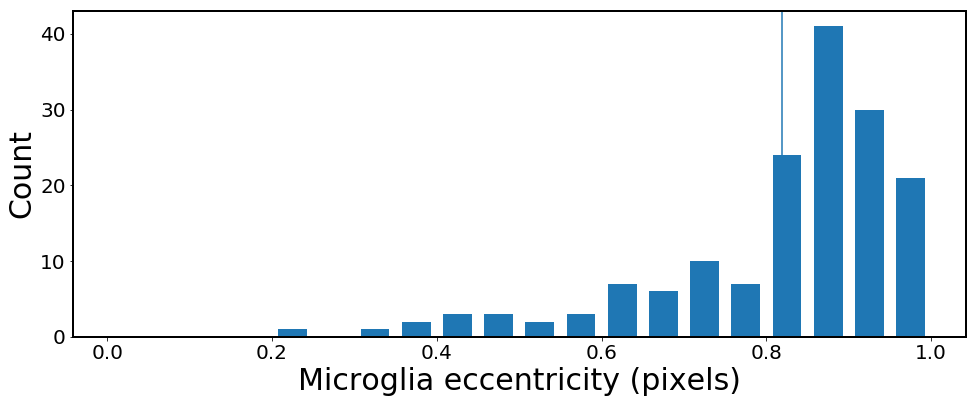

In [26]:
features_hist(features, 'eccentricity', bin_size=0.05, bin_range=1)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


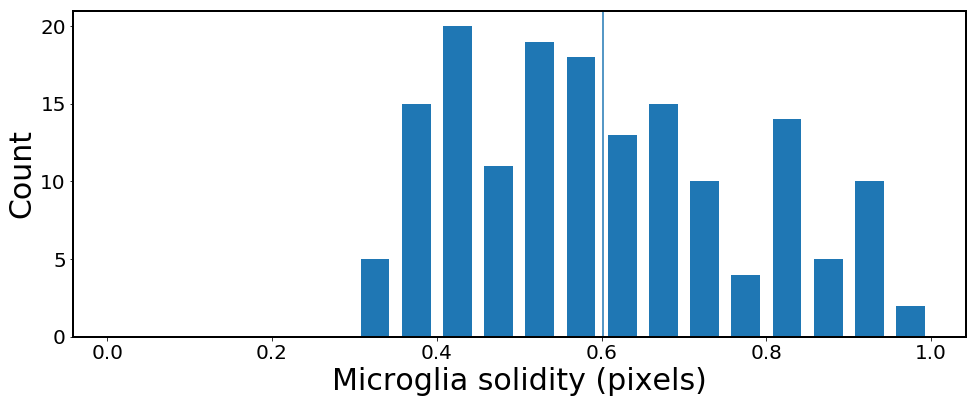

In [25]:
features_hist(features, 'solidity', bin_size=0.05, bin_range=1)

In [18]:
bin_size = 100
bin_range = 5000
xlabel = "Microglia Area (pixels)"
ylabel = "Count"

nbins = bin_range/bin_size + 1
test_bins = np.linspace(0, bin_range, nbins)
dist = features['area']

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


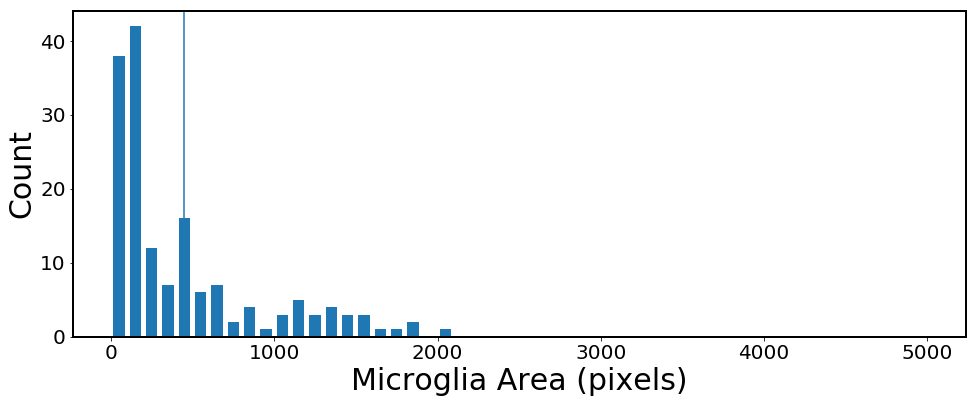

In [20]:
histogram, test_bins = np.histogram(dist, bins=test_bins)

# Plot_general_histogram_code
avg = np.mean(dist)
fig = plt.figure(figsize=(16, 6))

plt.rc('axes', linewidth=2)
plot = histogram
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2
bar = plt.bar(center, plot, align='center', width=width)
plt.axvline(avg)
plt.xlabel(xlabel, fontsize=30)
plt.ylabel(ylabel, fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
plt.show()